In [2]:
import pandas as pd 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import scikitplot as skplt

In [3]:
df= pd.read_csv('./data/consensus_dataset.csv')

In [4]:
X_train, X_test, y_train, y_test= train_test_split( df['ad'], df['consensus'], test_size =0.2)

In [5]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [6]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

SVC(gamma='auto', kernel='linear')

accuracy:   0.996
              precision    recall  f1-score   support

no consensus       0.99      1.00      1.00      1376
   consensus       1.00      0.99      1.00      1280

    accuracy                           1.00      2656
   macro avg       1.00      1.00      1.00      2656
weighted avg       1.00      1.00      1.00      2656

confusion matrix:
[[1376    0]
 [  10 1270]]



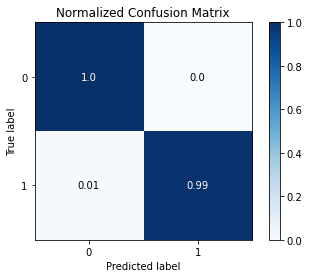

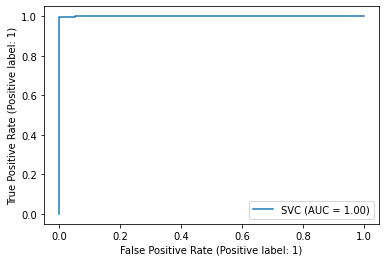

In [7]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [8]:
df_val = pd.read_csv('./data/sample_consensus.csv')
df_val

,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
...,...,...
80,we all think that education risks becoming th...,1
81,thounds of people are supporting ukraine \r\na...,1
82,most families are helping people suffering fro...,1
83,society is supporting those left homeless and ...,1


accuracy:   0.659
              precision    recall  f1-score   support

no consensus       0.78      0.65      0.71        55
   consensus       0.51      0.67      0.58        30

    accuracy                           0.66        85
   macro avg       0.65      0.66      0.65        85
weighted avg       0.69      0.66      0.67        85

confusion matrix:
[[36 19]
 [10 20]]



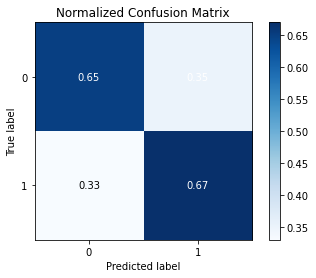

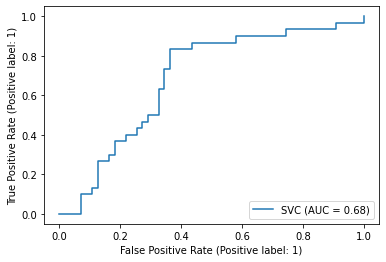

In [9]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)